In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("datasets/fertilizer_dataset2.csv")
df.head()

,Unnamed: 0,District_Name,Soil_color,Nitrogen,Phosphorous,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer,Link,Humidity
0,0,Kolhapur,Black,75,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo,71.8
1,1,Kolhapur,Black,80,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo,71.8
2,2,Kolhapur,Black,85,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo,71.8
3,3,Kolhapur,Black,90,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo,71.8
4,4,Kolhapur,Black,95,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo,71.8


In [3]:
df.columns

Index(['Unnamed: 0', 'District_Name', 'Soil_color', 'Nitrogen', 'Phosphorous',
       'Potassium', 'pH', 'Rainfall', 'Temperature', 'Crop', 'Fertilizer',
       'Link', 'Humidity'],
      dtype='object')

In [4]:
df.isna().sum()

Unnamed: 0       0
District_Name    0
Soil_color       0
Nitrogen         0
Phosphorous      0
Potassium        0
pH               0
Rainfall         0
Temperature      0
Crop             0
Fertilizer       0
Link             0
Humidity         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4513 entries, 0 to 4512
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     4513 non-null   int64  
 1   District_Name  4513 non-null   object 
 2   Soil_color     4513 non-null   object 
 3   Nitrogen       4513 non-null   int64  
 4   Phosphorous    4513 non-null   int64  
 5   Potassium      4513 non-null   int64  
 6   pH             4513 non-null   float64
 7   Rainfall       4513 non-null   int64  
 8   Temperature    4513 non-null   int64  
 9   Crop           4513 non-null   object 
 10  Fertilizer     4513 non-null   object 
 11  Link           4513 non-null   object 
 12  Humidity       4513 non-null   float64
dtypes: float64(2), int64(6), object(5)
memory usage: 458.5+ KB


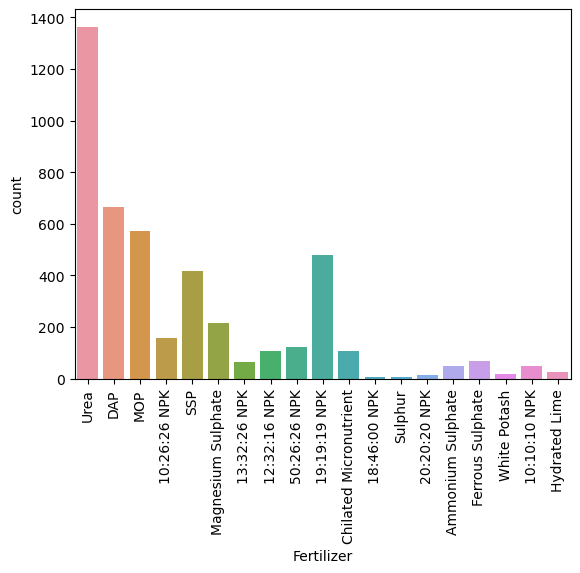

In [6]:
fert_count = sns.countplot(data=df, x='Fertilizer')
plt.xticks(rotation=90)
None

In [7]:
df['Fertilizer'].unique()

array(['Urea', 'DAP', 'MOP', '10:26:26 NPK', 'SSP', 'Magnesium Sulphate',
       '13:32:26 NPK', '12:32:16 NPK', '50:26:26 NPK', '19:19:19 NPK',
       'Chilated Micronutrient', '18:46:00 NPK', 'Sulphur',
       '20:20:20 NPK', 'Ammonium Sulphate', 'Ferrous Sulphate',
       'White Potash', '10:10:10 NPK', 'Hydrated Lime'], dtype=object)

In [8]:
# i1 = df[df['Fertilizer'] == '18:46:00 NPK'].index
# df.drop(index=i1, inplace=True)

# i2 = df[df['Fertilizer'] == 'Sulphur'].index
# df.drop(index=i2, inplace=True)

# i3 = df[df['Fertilizer'] == '20:20:20 NPK'].index
# df.drop(index=i3, inplace=True)

# i4 = df[df['Fertilizer'] == '10:10:10 NPK'].index
# df.drop(index=i4, inplace=True)

# i5 = df[df['Fertilizer'] == 'White Potash'].index
# df.drop(index=i5, inplace=True)

# i6 = df[df['Fertilizer'] == 'Hydrated Lime'].index
# df.drop(index=i6, inplace=True)

In [9]:
print((df['Fertilizer'] == '18:46:00 NPK').sum())
print((df['Fertilizer'] == 'Sulphur').sum())
print((df['Fertilizer'] == '20:20:20 NPK').sum())
print((df['Fertilizer'] == '10:10:10 NPK').sum())
print((df['Fertilizer'] == 'White Potash').sum())
print((df['Fertilizer'] == 'Hydrated Lime').sum())

6
6
15
50
19
25


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# df1['Soil_color'] = le.fit_transform(df1['Soil_color'])
df['Crop'] = le.fit_transform(df['Crop'])

In [11]:
features = ['Nitrogen', 'Phosphorous', 'Temperature', 'Humidity']
X = df[features]
y = df[['Fertilizer']]

In [25]:
y = le.fit_transform(y)

/Users/myothiha/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [27]:
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [28]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (3610, 4)
y_train (3610,)
X_test (903, 4)
y_test (903,)


In [29]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    # 'XGBoost': xgb.XGBClassifier(),
    # Add other classifiers as needed
}

for clf_name, clf in classifiers.items():
    scores = cross_val_score(clf, X_train, y_train, cv=5)  # Adjust cv value as needed
    print(f"{clf_name}: Accuracy {np.mean(scores)} (+/- {np.std(scores)})")


best_classifier_name = max(classifiers, key=lambda k: np.mean(cross_val_score(classifiers[k], X_train, y_train, cv=5)))
model = classifiers[best_classifier_name]
print(f"The best classifier is {best_classifier_name}.")

Random Forest: Accuracy 0.37562326869806095 (+/- 0.006341010051113344)
Support Vector Machine: Accuracy 0.3847645429362881 (+/- 0.00577082178836555)
Logistic Regression: Accuracy 0.32825484764542934 (+/- 0.0067852901462138)
K-Nearest Neighbors: Accuracy 0.4096952908587258 (+/- 0.006156817388058952)
The best classifier is K-Nearest Neighbors.


In [31]:
# import numpy as np
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score
# import xgboost as xgb

# # Define the parameter grid for XGBoost
# param_grid = {
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.001, 0.01, 0.1],
#     'n_estimators': [50, 100, 200],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0],
# }

# # Create an XGBoost classifier
# xgb_classifier = xgb.XGBClassifier(objective='binary:logistic')

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5, scoring='accuracy', verbose=1)
# grid_search.fit(X_train, y_train)

# # Print the best parameters and corresponding accuracy
# print("Best Parameters: ", grid_search.best_params_)
# print("Best Cross-validated Accuracy: {:.4f}".format(grid_search.best_score_))

# # Get the best model from grid search
# best_xgb_model = grid_search.best_estimator_

# # Evaluate the best model on the test set
# y_pred = best_xgb_model.predict(X_test)
# test_accuracy = accuracy_score(y_test, y_pred)
# print("Test accuracy of the best XGBoost model: {:.4f}".format(test_accuracy))


In [32]:
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming 'X' is your feature matrix and 'y' is the target variable
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert y to a 1-dimensional array
y_train_flat = np.ravel(y_train)
y_test_flat = np.ravel(y_test)

# Define the parameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance (L1), 2 for Euclidean distance (L2)
}

# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy', verbose=1, return_train_score=True)
grid_search.fit(X_train, y_train_flat)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-validated Accuracy: {:.4f}".format(grid_search.best_score_))

# Get the best model from grid search
best_knn_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_knn_model.predict(X_test)
test_accuracy = accuracy_score(y_test_flat, y_pred)
print("Test accuracy of the best KNN model: {:.4f}".format(test_accuracy))

model = best_knn_model

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters:  {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Best Cross-validated Accuracy: 0.4368
Test accuracy of the best KNN model: 0.4042


In [33]:
# model = best_xgb_model
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.6058171745152354

In [34]:
yhat_test = model.predict(X_test)
yhat_test

array([10,  0,  0,  1, 17,  2, 17, 17, 10, 13, 10,  5, 17,  5, 17, 13, 17,
       14, 15, 15,  7, 17, 13, 14, 10, 17,  2, 17, 14, 10,  5,  1,  5, 17,
       17, 17,  3, 17, 17,  5, 17, 10,  5, 17, 10, 17,  9, 17, 10, 13,  0,
       13, 10,  5,  5, 17, 15, 15,  5, 17, 17, 10, 13,  5, 13, 13, 17, 10,
       17, 13, 17, 17, 15, 17,  5, 15,  3,  9, 14, 17, 17, 10, 10, 17, 17,
       17, 10,  1,  5,  5, 15, 10, 17, 13, 15, 17,  1,  7, 13,  9, 17, 15,
        0,  8,  9, 10, 17, 17, 17, 17,  5, 10, 10, 17, 15, 15, 10, 13, 17,
       17, 13, 10, 15, 10, 17,  2, 17,  1, 17,  5, 17,  5,  7, 14,  5, 13,
       11, 17,  0, 10,  2, 10,  5, 14, 10, 15, 13, 10, 11, 10, 17,  5,  5,
        5, 15, 17, 17, 10, 17,  9, 13, 13, 10, 15,  8, 10, 13,  9,  5,  2,
       11, 10, 10, 17,  0, 17, 13,  9, 10, 13, 13, 13, 15,  0, 17, 15,  5,
        2, 13, 13, 17,  1, 10, 15, 10,  9, 14, 17,  5, 10, 10, 17, 17, 15,
        5, 17, 10,  2, 13,  1, 17,  3, 14,  5, 17, 17, 13, 10, 17, 13, 10,
        2, 17,  8,  5, 10

In [35]:
from sklearn.metrics import classification_report

yhat_train = model.predict(X_train)
print(classification_report(y_train, yhat_train))

              precision    recall  f1-score   support

           0       0.69      0.93      0.79        40
           1       0.54      0.62      0.58       125
           2       0.38      0.47      0.42        85
           3       0.53      0.55      0.54        53
           4       0.43      0.60      0.50         5
           5       0.67      0.74      0.70       384
           6       0.44      0.33      0.38        12
           7       0.60      0.51      0.55        99
           8       0.62      0.53      0.57        40
           9       0.60      0.84      0.70        86
          10       0.56      0.59      0.57       533
          11       0.69      0.78      0.73        54
          12       1.00      0.15      0.26        20
          13       0.63      0.58      0.60       457
          14       0.61      0.56      0.58       172
          15       0.59      0.61      0.60       334
          16       0.50      0.60      0.55         5
          17       0.63    

In [41]:
top3_yhat_test = model.predict_proba(X_test)

In [55]:
from sklearn.metrics import top_k_accuracy_score
top_k_accuracy_score(y_test, top3_yhat_test, k=4)

0.9601328903654485

In [37]:
print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.41      0.90      0.56        10
           1       0.33      0.29      0.31        31
           2       0.18      0.24      0.20        21
           3       0.07      0.08      0.07        13
           4       0.00      0.00      0.00         1
           5       0.47      0.49      0.48        96
           6       0.00      0.00      0.00         3
           7       0.06      0.04      0.05        25
           8       0.78      0.70      0.74        10
           9       0.42      0.68      0.52        22
          10       0.38      0.38      0.38       134
          11       0.50      0.64      0.56        14
          12       1.00      0.20      0.33         5
          13       0.49      0.42      0.45       114
          14       0.33      0.35      0.34        43
          15       0.39      0.45      0.42        83
          16       0.00      0.00      0.00         1
          17       0.43    